In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgbm
from seaborn import *
import seaborn as sns; sns.set()
import ipywidgets as widgets
from scipy import stats

In [2]:
dataset = pd.read_csv('Loan_condition.csv')

In [3]:
#removing the id column
#dataset = dataset.drop('id', axis = 1)
dataset.head()

,year,Date,Month,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,interest_rate,grade,installment,region,loan_condition
0,2011,1,12,10.0,RENT,Low,24000,5000,36 months,INDIVIDUAL,credit_card,10.65,B,162.87,munster,Good Loan
1,2011,1,12,10.0,RENT,Low,12252,2400,36 months,INDIVIDUAL,small_business,15.96,C,84.33,cannught,Good Loan
2,2011,1,12,10.0,RENT,Low,49200,10000,36 months,INDIVIDUAL,other,13.49,C,339.31,ulster,Good Loan
3,2011,1,12,1.0,RENT,Low,80000,3000,60 months,INDIVIDUAL,other,12.69,B,67.79,ulster,Good Loan
4,2011,1,12,3.0,RENT,Low,36000,5000,36 months,INDIVIDUAL,wedding,7.90,A,156.46,munster,Good Loan


In [4]:
dataset.describe()

,year,Date,Month,emp_length_int,annual_inc,loan_amount,interest_rate,installment
count,18023.000000,18023.0,18023.000000,18023.000000,1.802300e+04,18023.000000,18023.000000,18023.000000
mean,2010.844199,1.0,8.492038,5.382048,6.870919e+04,12200.302391,12.594515,343.667286
std,0.460184,0.0,2.644583,3.415127,4.836808e+04,8254.486938,4.089778,219.977078
min,2008.000000,1.0,1.000000,0.500000,4.080000e+03,1000.000000,5.420000,21.740000
25%,2011.000000,1.0,7.000000,2.000000,4.100000e+04,6000.000000,9.910000,176.475000
50%,2011.000000,1.0,9.000000,5.000000,6.000000e+04,10000.000000,12.420000,303.210000
75%,2011.000000,1.0,11.000000,9.000000,8.231250e+04,16000.000000,15.620000,460.100000
max,2011.000000,1.0,12.000000,10.000000,1.782000e+06,35000.000000,24.590000,1305.190000


In [5]:
#x = dataset.columns
#target_variable = widgets.Dropdown(options= x, value=None)
#target_variable
#target_variable.value

In [6]:
#dataset = dataset.dropna(subset=[target_variable.value])
#missing_values_cols = dataset.columns[dataset.isna().any()].tolist()
#missing_values_cols

In [7]:
#treating missing value using randomforest

#dataset_operate = dataset
#
#for i in range(0,len(missing_values_cols)):
#    if dataset[(missing_values_cols[i])].dtypes in ['int','int32','float64']:
#        test_data = dataset_operate[dataset_operate.loc[:,(missing_values_cols[i])].isnull()].copy()
#        train = dataset_operate.dropna(subset = [missing_values_cols[i]])
#        missing_value = train[missing_values_cols[i]]
#
#        new_train = train.drop(missing_values_cols,axis = 1)
#        new_train = (new_train.iloc[:, :-1])
#        new_train = pd.get_dummies(new_train)
#        new_train_list = list(new_train.columns)
#
#        new_test_data = test_data.drop(missing_values_cols,axis = 1)
#        new_test_data = (new_test_data.iloc[:, :-1])
#        new_test_data = pd.get_dummies(new_test_data)
#        cols_test = new_test_data.columns.tolist()
#
#        new_train = new_train[cols_test]
#        new_train = np.array(new_train)
#        new_test_data = np.array(new_test_data)
#
#        #Making models to predict missing values
#        Random_forest = RandomForestRegressor().fit(new_train,missing_value)
#        pred_Random_forest = Random_forest.predict(new_test_data)
#        test_data[missing_values_cols[i]] = (pred_Random_forest)
#        dataset_operate = test_data.append(train)
#        
#    elif dataset[(missing_values_cols[i])].dtypes in ['object']:
#        test_data = dataset_operate[dataset_operate.loc[:,(missing_values_cols[i])].isnull()].copy()
#        train = dataset_operate.dropna(subset = [missing_values_cols[i]])
#        missing_value = train[missing_values_cols[i]]
#
#        new_train = train.drop(missing_values_cols,axis = 1)
#        new_train = (new_train.iloc[:, :-1])
#        new_train = pd.get_dummies(new_train)
#        new_train_list = list(new_train.columns)
#
#        new_test_data = test_data.drop(missing_values_cols,axis = 1)
#        new_test_data = (new_test_data.iloc[:, :-1])
#        new_test_data = pd.get_dummies(new_test_data)
#        cols_test = new_test_data.columns.tolist()
#
#        new_train = new_train[cols_test]
#        new_train = np.array(new_train)
#        new_test_data = np.array(new_test_data)
#
#        #Making models to predict missing values
#        Random_forest = RandomForestClassifier().fit(new_train,missing_value)
#        pred_Random_forest = Random_forest.predict(new_test_data)
#        test_data[missing_values_cols[i]] = (pred_Random_forest)
#        dataset_operate = test_data.append(train)
#
#dataset = dataset_operate
#dataset = dataset.reset_index(drop=True)

In [8]:
#Making loan condition into numeric 
#dataset['loan_condition'] = np.where(dataset['loan_condition'] == 'Good Loan', 1, 0)
#dataset.head()

In [9]:
dataset1 = pd.get_dummies(dataset)
dataset1.head()
dataset1 = dataset1.drop(['loan_condition_Bad Loan','term_ 60 months'], axis = 1)
dataset1.head()

,year,Date,Month,emp_length_int,annual_inc,loan_amount,interest_rate,installment,home_ownership_MORTGAGE,home_ownership_OTHER,...,grade_D,grade_E,grade_F,grade_G,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster,loan_condition_Good Loan
0,2011,1,12,10.0,24000,5000,10.65,162.87,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2011,1,12,10.0,12252,2400,15.96,84.33,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2011,1,12,10.0,49200,10000,13.49,339.31,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2011,1,12,1.0,80000,3000,12.69,67.79,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2011,1,12,3.0,36000,5000,7.90,156.46,0,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
dataset1.columns
cols = ['year', 'emp_length_int', 'annual_inc', 'loan_amount',
       'interest_rate', 'installment', 'home_ownership_MORTGAGE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'income_category_High', 'income_category_Medium',
       'term_ 36 months', 
       'loan_condition_Good Loan']

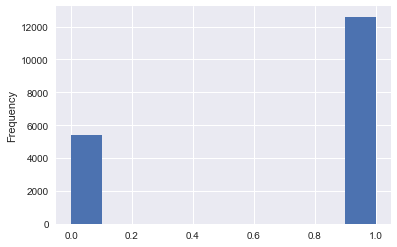

In [17]:
dataset = dataset1
dataset['loan_condition_Good Loan'].astype(int).plot.hist();

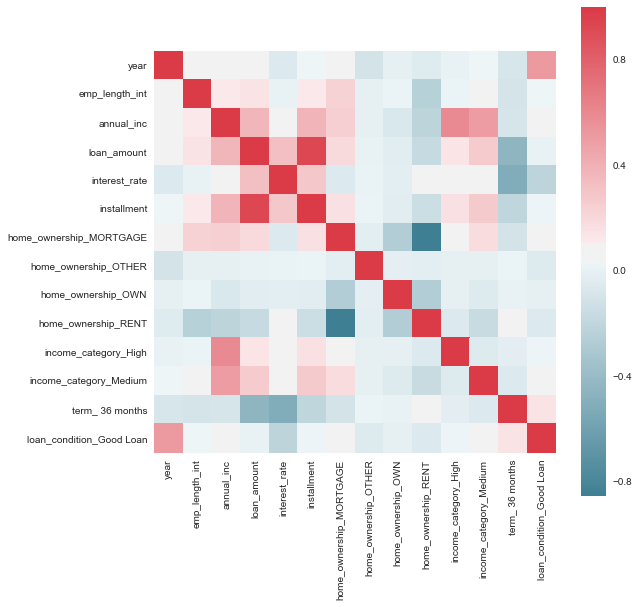

In [18]:
f, ax = plt.subplots(figsize=(9,9))
corr = dataset[cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

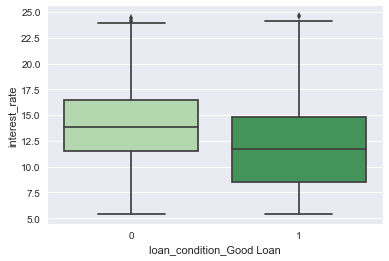

In [19]:
# Use a color palette
x = sns.boxplot( y=dataset["interest_rate"], x=dataset["loan_condition_Good Loan"], palette="Greens")

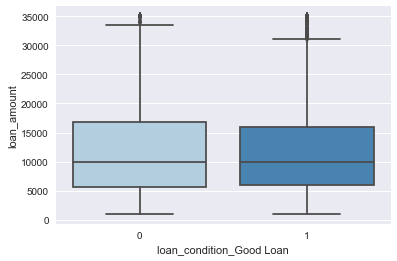

In [20]:
# Use a color palette
x = sns.boxplot( y=dataset["loan_amount"], x=dataset["loan_condition_Good Loan"], palette="Blues")

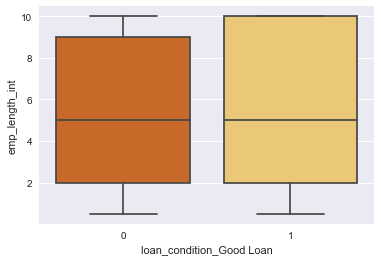

In [21]:
# Use a color palette
x = sns.boxplot( y=dataset["emp_length_int"], x=dataset["loan_condition_Good Loan"], palette="YlOrBr_r")

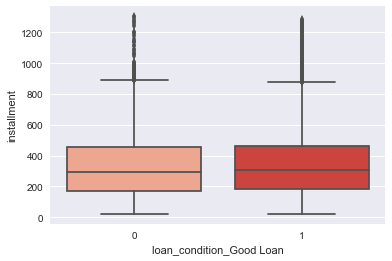

In [22]:
# Use a color palette
x = sns.boxplot( y=dataset["installment"], x=dataset["loan_condition_Good Loan"], palette="Reds")

In [23]:
def kdeplot(feature):
    plt.figure(figsize=(10, 1.5))
    plt.title("Distribution of {}".format(feature))
    ax0 = sns.kdeplot(dataset[dataset['loan_condition_Good Loan'] == 0][feature].dropna(), color= 'Blue', shade='Blue', label= 'Bad Loan')
    ax1 = sns.kdeplot(dataset[dataset['loan_condition_Good Loan'] == 1][feature].dropna(), color= 'Red', shade='Yellow', label= 'Good Loan')

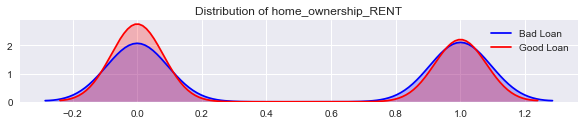

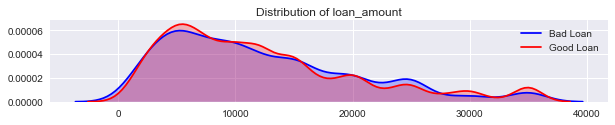

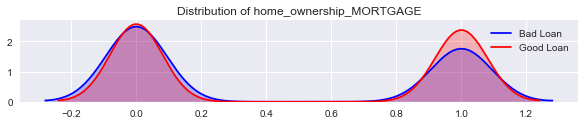

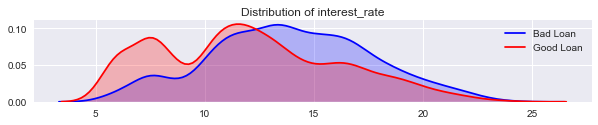

In [24]:
kdeplot('home_ownership_RENT')
kdeplot('loan_amount')
kdeplot('home_ownership_MORTGAGE')
kdeplot('interest_rate')

In [25]:
#taking name and values of dependent variables
labels = np.array(dataset.iloc[:,-1])
    
# Remove the labels from the features, axis 1 refers to the columns
dataset= dataset.iloc[:, :-1]

#One hot encoding
dataset1 = pd.get_dummies(dataset)

# Saving feature names for later use
dataset1_list = list(dataset1.columns)

# Convert to numpy array
dataset1 = np.array(dataset1)

# Split the data into training and testing sets
train_dataset1, test_dataset1, train_labels, test_labels = train_test_split(dataset1, labels, test_size = 0.2, random_state = 1)

In [26]:
#Model number 1
m_1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)

In [27]:
#Model number 2
m_2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)


In [28]:
#Model number 3
m_3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)


In [29]:
#Model number 4
m_4 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)


In [30]:
#Model number 5
m_5 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)


In [31]:
#Model number 6
m_6 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)

In [32]:
#Model number 7
m_7 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)

In [33]:
#Model number 8
m_8 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)

In [34]:
#Model number 9
m_9 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)

In [45]:
#Model number 8
m_10 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(train_dataset1, train_labels)

In [36]:
#Accuracy of ensemble model of Logistics
model2 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2)], voting='hard')
model2.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [37]:
#Accuracy of ensemble model of Logistics
model3 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3)], voting='hard')
model3.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [38]:
#Accuracy of ensemble model of Logistics
model4 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4)], voting='hard')
model4.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [39]:
#Accuracy of ensemble model of Logistics
model5 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5)], voting='hard')
model5.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [40]:
#Accuracy of ensemble model of Logistics
model6 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6)], voting='hard')
model6.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [41]:
#Accuracy of ensemble model of Logistics
model7 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7)], voting='hard')
model7.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [42]:
#Accuracy of ensemble model of Logistics
model8 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7), ('m_8', m_8)], voting='hard')
model8.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [43]:
#Accuracy of ensemble model of Logistics
model9 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7), ('m_8', m_8), ('m_9', m_9)], voting='hard')
model9.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [46]:
#Accuracy of ensemble model of Logistics
model10 = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7), ('m_8', m_8), ('m_9', m_9), ('m_10', m_10)], voting='hard')
model10.fit(train_dataset1,train_labels)

VotingClassifier(estimators=[('m_1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [55]:
accuracy_ensembles = pd.DataFrame(columns = ['Algorithm','acc_of_1_model', 'ensemble_of_2', 'ensemble_of_3', 
                                'ensemble_of_4', 'ensemble_of_5', 'ensemble_of_6',
                                'ensemble_of_7', 'ensemble_of_8', 'ensemble_of_9', 'ensemble_of_10'])

f1score_ensembles = pd.DataFrame(columns = ['Algorithm','f1_of_1_model', 'ensemble_of_2', 'ensemble_of_3', 
                                'ensemble_of_4', 'ensemble_of_5', 'ensemble_of_6',
                                'ensemble_of_7', 'ensemble_of_8', 'ensemble_of_9', 'ensemble_of_10'])

In [56]:
accuracy_score_ens_1 =  m_1.score(test_dataset1,test_labels)
accuracy_score_ens_2 =  model2.score(test_dataset1,test_labels)
accuracy_score_ens_3 =  model3.score(test_dataset1,test_labels)
accuracy_score_ens_4 =  model4.score(test_dataset1,test_labels)
accuracy_score_ens_5 =  model5.score(test_dataset1,test_labels)
accuracy_score_ens_6 =  model6.score(test_dataset1,test_labels)
accuracy_score_ens_7 =  model7.score(test_dataset1,test_labels)
accuracy_score_ens_8 =  model8.score(test_dataset1,test_labels)
accuracy_score_ens_9 =  model9.score(test_dataset1,test_labels)
accuracy_score_ens_10 = model10.score(test_dataset1,test_labels)

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [57]:
f1_score_ens_1 = f1_score(m_1.predict(test_dataset1) ,test_labels)
f1_score_ens_2 = f1_score(model2.predict(test_dataset1),test_labels)
f1_score_ens_3 = f1_score(model3.predict(test_dataset1),test_labels)
f1_score_ens_4 = f1_score(model4.predict(test_dataset1),test_labels)
f1_score_ens_5 = f1_score(model5.predict(test_dataset1),test_labels)
f1_score_ens_6 = f1_score(model6.predict(test_dataset1),test_labels)
f1_score_ens_7 = f1_score(model7.predict(test_dataset1),test_labels)
f1_score_ens_8 = f1_score(model8.predict(test_dataset1),test_labels)
f1_score_ens_9 = f1_score(model9.predict(test_dataset1),test_labels)
f1_score_ens_10 = f1_score(model10.predict(test_dataset1),test_labels)

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [58]:
f1score_ensembles = accuracy_ensembles.append({'Algorithm':'RandomForest',
                                                'f1_of_1_model':f1_score_ens_1  , 
                                                'ensemble_of_2':f1_score_ens_2  , 
                                                'ensemble_of_3':f1_score_ens_3  ,
                                                'ensemble_of_4':f1_score_ens_4  , 
                                                'ensemble_of_5':f1_score_ens_5  , 
                                                'ensemble_of_6':f1_score_ens_6  ,
                                                'ensemble_of_7':f1_score_ens_7  , 
                                                'ensemble_of_8':f1_score_ens_8  , 
                                                'ensemble_of_9':f1_score_ens_9  , 
                                                'ensemble_of_10':f1_score_ens_10} ,ignore_index=True)

accuracy_ensembles = accuracy_ensembles.append({'Algorithm':'RandomForest',
                                                'acc_of_1_model':accuracy_score_ens_1 , 
                                                'ensemble_of_2':accuracy_score_ens_2 , 
                                                'ensemble_of_3':accuracy_score_ens_3 ,
                                                'ensemble_of_4':accuracy_score_ens_4 , 
                                                'ensemble_of_5':accuracy_score_ens_5 , 
                                                'ensemble_of_6':accuracy_score_ens_6 ,
                                                'ensemble_of_7':accuracy_score_ens_7 , 
                                                'ensemble_of_8':accuracy_score_ens_8 , 
                                                'ensemble_of_9':accuracy_score_ens_9 , 
                                                'ensemble_of_10':accuracy_score_ens_10} ,ignore_index=True)

In [59]:
accuracy_ensembles

,Algorithm,acc_of_1_model,ensemble_of_2,ensemble_of_3,ensemble_of_4,ensemble_of_5,ensemble_of_6,ensemble_of_7,ensemble_of_8,ensemble_of_9,ensemble_of_10
0,RandomForest,0.844383,0.845215,0.863245,0.857975,0.862968,0.864355,0.860749,0.864355,0.862136,0.861859


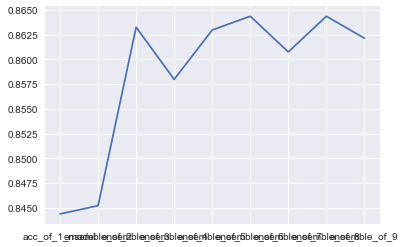

In [62]:
plt.plot(accuracy_ensembles.iloc[0,1:10])

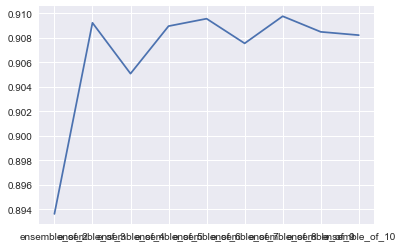

In [63]:
plt.plot(f1score_ensembles.iloc[0,1:11])

In [66]:
#Model number 1
m_1 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 2
m_2 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 3
m_3 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.07, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 4
m_4 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 5
m_5 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.08, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=6,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 6
m_6 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.075, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 7
m_7 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 8
m_8 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=225,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 9
m_9 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)

#Model number 10
m_10 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.04, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False).fit(train_dataset1, train_labels)


In [ ]:

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7), ('m_8', m_8)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7), ('m_8', m_8), ('m_9', m_9)], voting='hard')
model.fit(train_dataset1,train_labels)

#Accuracy of ensemble model of Logistics
model = VotingClassifier(estimators=[('m_1', m_1), ('m_2', m_2), ('m_3', m_3), ('m_4', m_4), ('m_5', m_5),
                                     ('m_6', m_6), ('m_7', m_7), ('m_8', m_8), ('m_9', m_9), ('m_10', m_10)], voting='hard')
model.fit(train_dataset1,train_labels)


accuracy_score_ens_1 =  m_1.score(test_dataset1,test_labels)
accuracy_score_ens_2 =  model2.score(test_dataset1,test_labels)
accuracy_score_ens_3 =  model3.score(test_dataset1,test_labels)
accuracy_score_ens_4 =  model4.score(test_dataset1,test_labels)
accuracy_score_ens_5 =  model5.score(test_dataset1,test_labels)
accuracy_score_ens_6 =  model6.score(test_dataset1,test_labels)
accuracy_score_ens_7 =  model7.score(test_dataset1,test_labels)
accuracy_score_ens_8 =  model8.score(test_dataset1,test_labels)
accuracy_score_ens_9 =  model9.score(test_dataset1,test_labels)
accuracy_score_ens_10 = model10.score(test_dataset1,test_labels)

f1_score_ens_1 = f1_score(m_1.predict(test_dataset1) ,test_labels)
f1_score_ens_2 = f1_score(model2.predict(test_dataset1),test_labels)
f1_score_ens_3 = f1_score(model3.predict(test_dataset1),test_labels)
f1_score_ens_4 = f1_score(model4.predict(test_dataset1),test_labels)
f1_score_ens_5 = f1_score(model5.predict(test_dataset1),test_labels)
f1_score_ens_6 = f1_score(model6.predict(test_dataset1),test_labels)
f1_score_ens_7 = f1_score(model7.predict(test_dataset1),test_labels)
f1_score_ens_8 = f1_score(model8.predict(test_dataset1),test_labels)
f1_score_ens_9 = f1_score(model9.predict(test_dataset1),test_labels)
f1_score_ens_10 = f1_score(model10.predict(test_dataset1),test_labels)

f1score_ensembles = accuracy_ensembles.append({'Algorithm':'RandomForest',
                                                'f1_of_1_model':f1_score_ens_1  , 
                                                'ensemble_of_2':f1_score_ens_2  , 
                                                'ensemble_of_3':f1_score_ens_3  ,
                                                'ensemble_of_4':f1_score_ens_4  , 
                                                'ensemble_of_5':f1_score_ens_5  , 
                                                'ensemble_of_6':f1_score_ens_6  ,
                                                'ensemble_of_7':f1_score_ens_7  , 
                                                'ensemble_of_8':f1_score_ens_8  , 
                                                'ensemble_of_9':f1_score_ens_9  , 
                                                'ensemble_of_10':f1_score_ens_10} ,ignore_index=True)

accuracy_ensembles = accuracy_ensembles.append({'Algorithm':'RandomForest',
                                                'acc_of_1_model':accuracy_score_ens_1 , 
                                                'ensemble_of_2':accuracy_score_ens_2 , 
                                                'ensemble_of_3':accuracy_score_ens_3 ,
                                                'ensemble_of_4':accuracy_score_ens_4 , 
                                                'ensemble_of_5':accuracy_score_ens_5 , 
                                                'ensemble_of_6':accuracy_score_ens_6 ,
                                                'ensemble_of_7':accuracy_score_ens_7 , 
                                                'ensemble_of_8':accuracy_score_ens_8 , 
                                                'ensemble_of_9':accuracy_score_ens_9 , 
                                                'ensemble_of_10':accuracy_score_ens_10} ,ignore_index=True)

In [ ]:
plt.plot(f1score_ensembles.iloc[1,1:11])

In [ ]:
plt.plot(accuracy_ensembles.iloc[1,1:11])